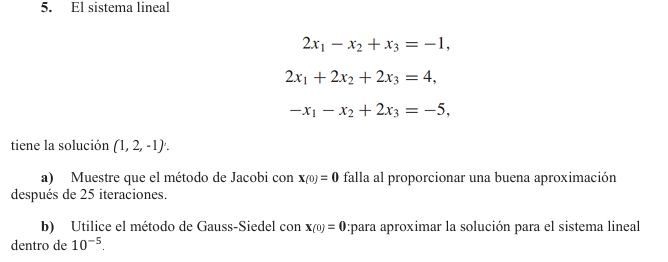

=== Literal a: Jacobi (25 iteraciones) ===
Iteración | x1       | x2       | x3       | Error
--------------------------------------------------
   0     | -0.500000 | 2.000000 | -2.500000 | 2.121320
   5     | 2.171875 | 6.687500 | -2.171875 | 4.971845
  10     | 5.577637 | 2.000000 | 3.577637 | 6.473756
  15     | -2.576279 | -12.305115 | 2.576279 | 15.172865
  20     | -12.969839 | 2.000000 | -14.969839 | 19.756335
  24     | -20.827873 | 2.000000 | -22.827873 | 30.869274


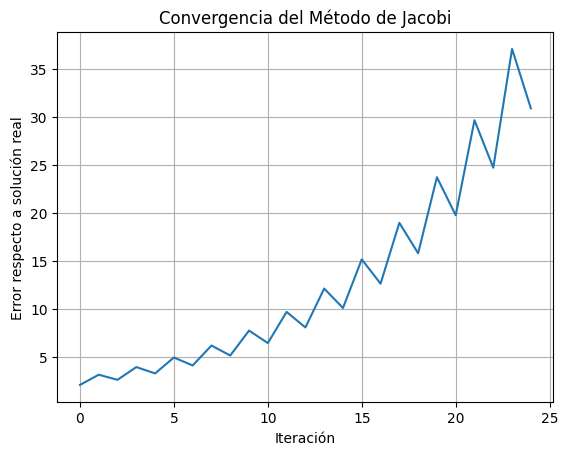

In [1]:
import numpy as np

def jacobi(A, b, max_iter=25, x0=None):
    """
    Método de Jacobi para resolver Ax = b
    """
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    
    x = x0.copy()
    x_new = np.zeros(n)
    errors = []
    
    print("Iteración | x1       | x2       | x3       | Error")
    print("--------------------------------------------------")
    
    for k in range(max_iter):
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sigma) / A[i, i]
        
        error = np.linalg.norm(x_new - np.array([1, 2, -1]))  # Error respecto a solución real
        errors.append(error)
        
        # Mostrar cada 5 iteraciones para no saturar la salida
        if k % 5 == 0 or k == max_iter-1:
            print(f"{k:4d}     | {x_new[0]:.6f} | {x_new[1]:.6f} | {x_new[2]:.6f} | {error:.6f}")
        
        x = x_new.copy()
    
    return x, errors

# Definir el sistema
A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]])
b = np.array([-1, 4, -5])

# Solución conocida
sol_real = np.array([1, 2, -1])

# Aplicar Jacobi
print("=== Literal a: Jacobi (25 iteraciones) ===")
x_jacobi, errors_jacobi = jacobi(A, b)

# Gráfico de convergencia
import matplotlib.pyplot as plt
plt.plot(range(25), errors_jacobi)
plt.title("Convergencia del Método de Jacobi")
plt.xlabel("Iteración")
plt.ylabel("Error respecto a solución real")
plt.grid()
plt.show()


=== Literal b: Gauss-Seidel (tol=10⁻⁵) ===

Iteración | x1       | x2       | x3       | Error
--------------------------------------------------
   0     | -0.500000 | 2.500000 | -1.500000 | 1.658312
   5     | 0.968750 | 2.062500 | -0.984375 | 0.071603
  10     | 1.003418 | 1.995605 | -1.000488 | 0.005589
  15     | 0.999817 | 2.000214 | -0.999985 | 0.000282
  20     | 1.000008 | 1.999991 | -1.000000 | 0.000012
  21     | 0.999996 | 2.000005 | -1.000000 | 0.000006


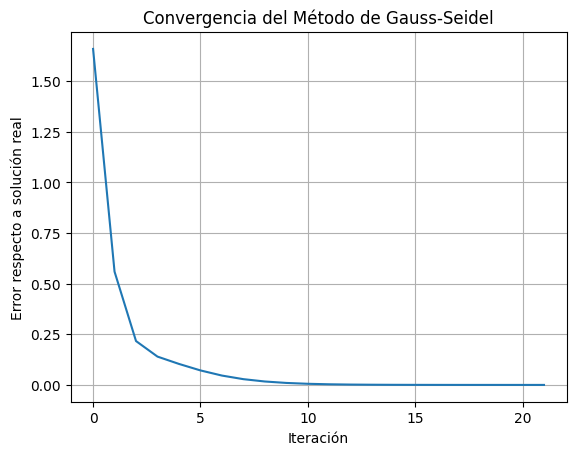


Solución final Gauss-Seidel:
x = [ 0.99999571  2.00000477 -0.99999976]
Error final: 6.42e-06

Verificación Ax = b:
Ax = [-1.00001311  4.00000143 -5.        ]
b = [-1  4 -5]


In [2]:
def gauss_seidel(A, b, tol=1e-5, max_iter=100, x0=None):
    """
    Método de Gauss-Seidel para resolver Ax = b
    """
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    
    x = x0.copy()
    errors = []
    
    print("\nIteración | x1       | x2       | x3       | Error")
    print("--------------------------------------------------")
    
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - sigma) / A[i, i]
        
        error = np.linalg.norm(x - sol_real)
        errors.append(error)
        
        # Mostrar cada 5 iteraciones
        if k % 5 == 0 or error < tol:
            print(f"{k:4d}     | {x[0]:.6f} | {x[1]:.6f} | {x[2]:.6f} | {error:.6f}")
        
        if error < tol:
            break
    
    return x, errors

# Aplicar Gauss-Seidel
print("\n=== Literal b: Gauss-Seidel (tol=10⁻⁵) ===")
x_gs, errors_gs = gauss_seidel(A, b)

# Gráfico de convergencia
plt.plot(range(len(errors_gs)), errors_gs)
plt.title("Convergencia del Método de Gauss-Seidel")
plt.xlabel("Iteración")
plt.ylabel("Error respecto a solución real")
plt.grid()
plt.show()

# Verificación final
print("\nSolución final Gauss-Seidel:")
print(f"x = {x_gs}")
print(f"Error final: {errors_gs[-1]:.2e}")
print("\nVerificación Ax = b:")
print(f"Ax = {A @ x_gs}")
print(f"b = {b}")